In [13]:
%matplotlib inline

In [14]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [15]:
df = pd.read_csv("data/cookie_cats.csv")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


our target here is sum_gamerounds.
To see whether the difference between game version gate_30 and gate_40 will result in significant sum_gamerounds difference.
As sum_gamerounds is numerical, we use Z-test for two independent samples.
Null hypothesis: there is no relationship between game version and sum_gamerounds.

In [16]:
# check if userid is unique
if len(df["userid"].unique()) == len(df):
    print("userid is unique")
else:
    print("userid not unique") 

userid is unique


In [17]:
# statistical parameters of sum_gamerounds. Max number is too big, can be an anomaly.
df["sum_gamerounds"].describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
1%           0.000000
5%           1.000000
10%          1.000000
20%          3.000000
50%         16.000000
80%         67.000000
90%        134.000000
95%        221.000000
99%        493.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [18]:
# split into test A and test B, corresponding two different game versions
test_a = df[df["version"] == "gate_30"]
test_b = df[df["version"] == "gate_40"]

Text(0, 0.5, 'counts')

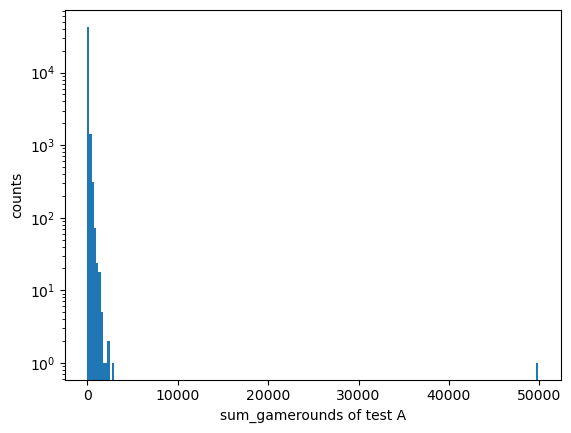

In [19]:
# visualize histogram of sum_gamerounds of test_a
# fig = px.histogram(test_a["sum_gamerounds"], log_y=True, title="sum_gamerounds of test A")
plt.hist(test_a["sum_gamerounds"], bins=200, log=True)
plt.xlabel("sum_gamerounds of test A")
plt.ylabel("counts")

Text(0, 0.5, 'counts')

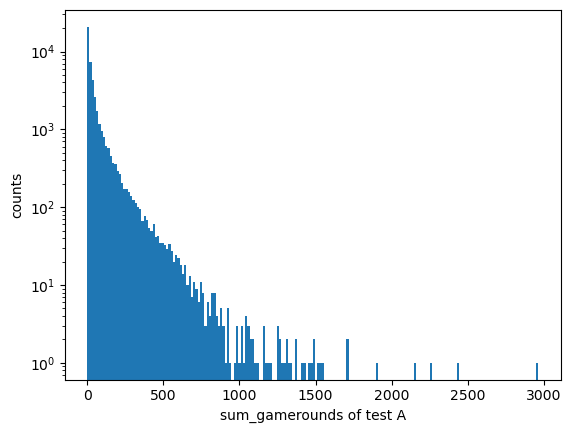

In [20]:
# remove the largest outlier
test_a = test_a[test_a["sum_gamerounds"] != test_a["sum_gamerounds"].max()]
plt.hist(test_a["sum_gamerounds"], bins=200, log=True)
plt.xlabel("sum_gamerounds of test A")
plt.ylabel("counts")

Text(0, 0.5, 'counts')

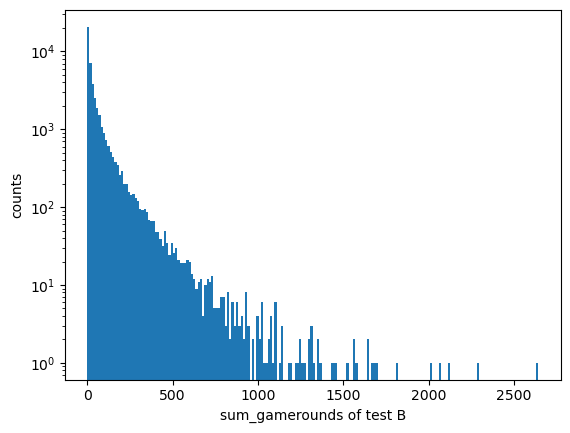

In [21]:
# visualize histogram of sum_gamerounds of test_b
plt.hist(test_b["sum_gamerounds"], bins=200, log=True)
plt.xlabel("sum_gamerounds of test B")
plt.ylabel("counts")

In [22]:
# based on visual inspection, sum_gamerounds does not follow normal distribution.
# Also, using test such as shapiro wilk test will give warning about large number of observations as shown below:
# shapiro wilk test for normality, H0: is normally distributed
_, swt_a_p = stats.shapiro(test_a["sum_gamerounds"])
_, swt_b_p = stats.shapiro(test_b["sum_gamerounds"])
swt_a_p, swt_b_p

/usr/lib/python3/dist-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.0, 0.0)

In [23]:
# using non-parametric mann whitney u test, H0: same distribution
_, mwut_p = stats.mannwhitneyu(test_a["sum_gamerounds"], test_b["sum_gamerounds"], alternative="two-sided")
mwut_p

0.05089155279145376

In [24]:
# where mwut_p > 0.05, cannot reject null hypothesis, meaning same distribution
mwut_p <= 0.05

False